In [1]:
setwd("C:/Users/DJ COMPUTERS/OneDrive/Desktop/R prog")
### CREDIT FRAUD DETECTION ###
### ADITYA KUMAR ROY ###

In [3]:
# Load required libraries
library(readxl)
library(readr)
library(dplyr)
library(caret)       # For model training and evaluation
library(randomForest) # For Random Forest
library(rpart)       # For Decision Tree
library(e1071)       # For logistic regression and cross-validation
library(pROC)        # For ROC and AUC

In [4]:
# Load the data
fraudTest <- read_csv("fraudTest.csv",show_col_types = FALSE)
head(fraudTest)

New names:
• `` -> `...1`


...1,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,⋯,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
<dbl>,<dttm>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,2020-06-21 12:14:25,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,⋯,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.98639,-81.20071,0
1,2020-06-21 12:14:33,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,⋯,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.45050,-109.96043,0
2,2020-06-21 12:14:53,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,⋯,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.49581,-74.19611,0
3,2020-06-21 12:15:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,⋯,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.81240,-80.88306,0
4,2020-06-21 12:15:17,3.526826e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,⋯,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.95915,-85.88473,0
5,2020-06-21 12:15:37,3.040768e+13,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,⋯,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.74716,-77.58420,0


In [5]:
# Exploratory Data Analysis
summary(fraudTest)
str(fraudTest)
colnames(fraudTest)
sum(is.na(fraudTest))
sum(duplicated(fraudTest))

      ...1        trans_date_trans_time                cc_num         
 Min.   :     0   Min.   :2020-06-21 12:14:25.00   Min.   :6.042e+10  
 1st Qu.:138930   1st Qu.:2020-08-09 06:10:27.50   1st Qu.:1.800e+14  
 Median :277859   Median :2020-10-03 00:59:48.00   Median :3.521e+15  
 Mean   :277859   Mean   :2020-10-02 01:54:25.17   Mean   :4.178e+17  
 3rd Qu.:416789   3rd Qu.:2020-12-01 03:03:04.00   3rd Qu.:4.635e+15  
 Max.   :555718   Max.   :2020-12-31 23:59:34.00   Max.   :4.992e+18  
   merchant           category              amt              first          
 Length:555719      Length:555719      Min.   :    1.00   Length:555719     
 Class :character   Class :character   1st Qu.:    9.63   Class :character  
 Mode  :character   Mode  :character   Median :   47.29   Mode  :character  
                                       Mean   :   69.39                     
                                       3rd Qu.:   83.01                     
                                       Ma

spc_tbl_ [555,719 × 23] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1                 : num [1:555719] 0 1 2 3 4 5 6 7 8 9 ...
 $ trans_date_trans_time: POSIXct[1:555719], format: "2020-06-21 12:14:25" "2020-06-21 12:14:33" ...
 $ cc_num               : num [1:555719] 2.29e+15 3.57e+15 3.60e+15 3.59e+15 3.53e+15 ...
 $ merchant             : chr [1:555719] "fraud_Kirlin and Sons" "fraud_Sporer-Keebler" "fraud_Swaniawski, Nitzsche and Welch" "fraud_Haley Group" ...
 $ category             : chr [1:555719] "personal_care" "personal_care" "health_fitness" "misc_pos" ...
 $ amt                  : num [1:555719] 2.86 29.84 41.28 60.05 3.19 ...
 $ first                : chr [1:555719] "Jeff" "Joanne" "Ashley" "Brian" ...
 $ last                 : chr [1:555719] "Elliott" "Williams" "Lopez" "Williams" ...
 $ gender               : chr [1:555719] "M" "F" "F" "M" ...
 $ street               : chr [1:555719] "351 Darlene Green" "3638 Marsh Union" "9333 Valentine Point" "32941 Krystal Mill Apt.

[1] "...1"                  "trans_date_trans_time" "cc_num"               
 [4] "merchant"              "category"              "amt"                  
 [7] "first"                 "last"                  "gender"               
[10] "street"                "city"                  "state"                
[13] "zip"                   "lat"                   "long"                 
[16] "city_pop"              "job"                   "dob"                  
[19] "trans_num"             "unix_time"             "merch_lat"            
[22] "merch_long"            "is_fraud"

[1] 0

[1] 0

In [6]:
# Convert date column to Date type
fraudTest$trans_date_trans_time <- as.Date(fraudTest$trans_date_trans_time,
                                           format = "%Y-%m-%d")
# Rename columns and subset data
fraudTest <- fraudTest |> rename(Date = trans_date_trans_time)
Data <- fraudTest[-c(1,7,8,18,19,20)]  # Adjust column indices as needed

# Convert target variable to factor
Data$is_fraud <- as.factor(Data$is_fraud)

head(Data)

Date,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud
<date>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
2020-06-21,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,33.98639,-81.20071,0
2020-06-21,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",39.45050,-109.96043,0
2020-06-21,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",40.49581,-74.19611,0
2020-06-21,3.591920e+15,fraud_Haley Group,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,28.81240,-80.88306,0
2020-06-21,3.526826e+15,fraud_Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,44.95915,-85.88473,0
2020-06-21,3.040768e+13,fraud_Daugherty LLC,kids_pets,19.55,F,76752 David Lodge Apt. 064,Breesport,NY,14816,42.1939,-76.7361,520,Psychotherapist,41.74716,-77.58420,0


In [7]:
# Split data into training and test sets
set.seed(123)  # Set seed for reproducibility
trainIndex <- sample(1:nrow(Data), size = as.integer(0.7 * nrow(Data)),
                     replace = FALSE)
train_data <- Data[trainIndex, ]
test_data <- Data[-trainIndex, ]

In [8]:
# Decision Tree Model
tree_model <- rpart(is_fraud ~ ., data = train_data, method = "class")
tree_pred <- predict(tree_model, newdata = test_data, type = "class")
tree_pred <- factor(tree_pred, levels = levels(test_data$is_fraud))

# Evaluate Decision Tree Model
tree_cm <- confusionMatrix(tree_pred, test_data$is_fraud)
print("Decision Tree Model Evaluation:")
print(tree_cm)


[1] "Decision Tree Model Evaluation:"
Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 166010    236
         1     83    387
                                          
               Accuracy : 0.9981          
                 95% CI : (0.9979, 0.9983)
    No Information Rate : 0.9963          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7072          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9995          
            Specificity : 0.6212          
         Pos Pred Value : 0.9986          
         Neg Pred Value : 0.8234          
             Prevalence : 0.9963          
         Detection Rate : 0.9958          
   Detection Prevalence : 0.9972          
      Balanced Accuracy : 0.8103          
                                          
       'Positive'

In [9]:
# Random Forest Model
rf_model <- randomForest(is_fraud ~ ., data = train_data, ntree = 100)
rf_pred <- predict(rf_model, newdata = test_data)
rf_pred <- factor(rf_pred, levels = levels(test_data$is_fraud))

# Evaluate Random Forest Model
rf_cm <- confusionMatrix(rf_pred, test_data$is_fraud)
print("Random Forest Model Evaluation:")
print(rf_cm)


[1] "Random Forest Model Evaluation:"
Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 166064    257
         1     29    366
                                          
               Accuracy : 0.9983          
                 95% CI : (0.9981, 0.9985)
    No Information Rate : 0.9963          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7182          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9998          
            Specificity : 0.5875          
         Pos Pred Value : 0.9985          
         Neg Pred Value : 0.9266          
             Prevalence : 0.9963          
         Detection Rate : 0.9961          
   Detection Prevalence : 0.9976          
      Balanced Accuracy : 0.7937          
                                          
       'Positive'

[1] "Decision Tree Accuracy:"
 Accuracy 
0.9980866 
[1] "Random Forest Accuracy:"
 Accuracy 
0.9982845 


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9147

Setting levels: control = 0, case = 1

Setting direction: controls < cases



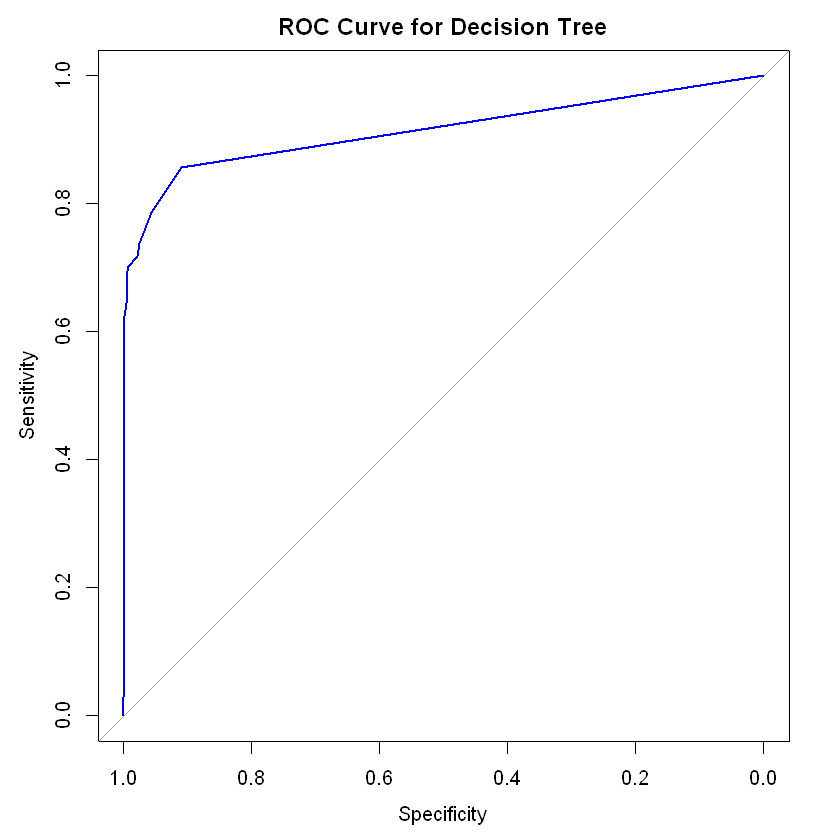

Area under the curve: 0.98

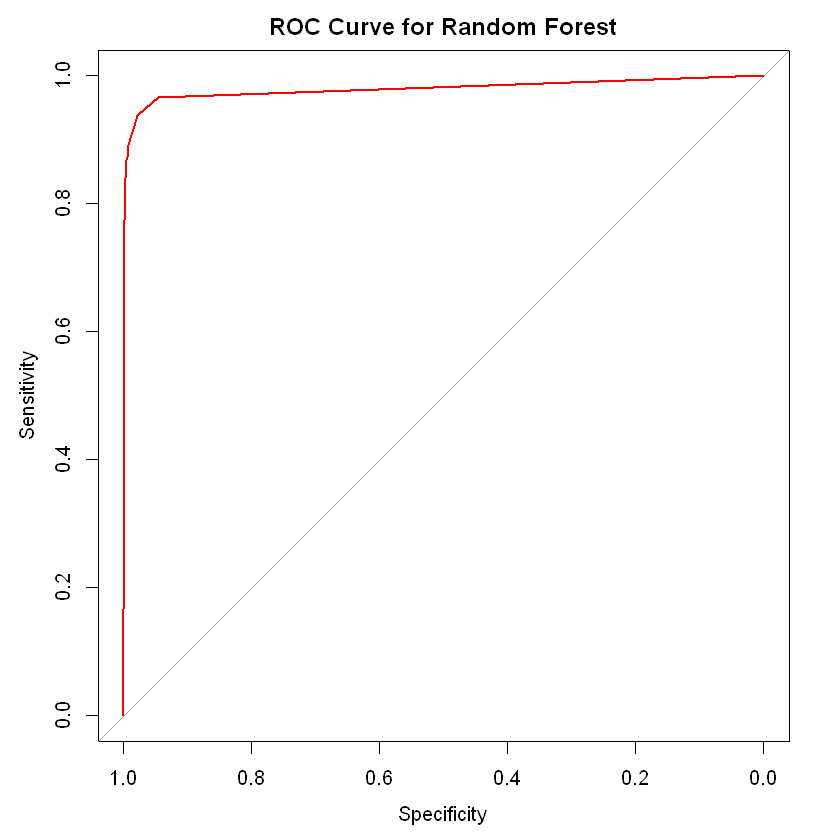

In [11]:
# Comparing Model Performance
print("Decision Tree Accuracy:")
print(tree_cm$overall["Accuracy"])
print("Random Forest Accuracy:")
print(rf_cm$overall["Accuracy"])

# ROC Curve and AUC for both models
tree_prob <- predict(tree_model, newdata = test_data, type = "prob")[, 2]
tree_roc <- roc(test_data$is_fraud, tree_prob)
plot(tree_roc, main = "ROC Curve for Decision Tree", col = "blue")
auc(tree_roc)

rf_prob <- predict(rf_model, newdata = test_data, type = "prob")[, 2]
rf_roc <- roc(test_data$is_fraud, rf_prob)
plot(rf_roc, main = "ROC Curve for Random Forest", col = "red")
auc(rf_roc)
